In [1]:
#Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File Path
movies_file = "movies.csv"
ratings_file = "ratings.csv"
links_file = "links.csv"
tags_file = "tags.csv"

# Read in the Data
df_movies = pd.read_csv(movies_file)
df_ratings = pd.read_csv(ratings_file)
df_links = pd.read_csv(links_file)
df_tags = pd.read_csv(tags_file)

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [5]:
df_ratings.head()
#ratings can be between 0.5 & 5 in .5 increments

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_ratings.info()
#There are 100,836 uniqu ratings in the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
df_links.head()

# movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.
#imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.
#tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
df_links.info()
#There are 9742 observations..one for each movie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


In [9]:
df_tags.head()
# Each line of this file represents one tag applied to one movie by one user

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
#Merging Dataset
movie_ratings_df = pd.merge(df_ratings, df_movies, on='movieId')
movie_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [12]:
movie_ratings_df['rating'].describe()
#Add some descriptive stats on the rating variable

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
num_users = len(movie_ratings_df.userId.unique())
num_items = len(movie_ratings_df.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 610 unique users and 9724 unique movies in this data set


In [14]:
ratings = pd.DataFrame(movie_ratings_df.groupby('title')['rating'].mean())
ratings.head()
#This gives is the average rating on each movie

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [15]:
ratings['number_of_ratings'] = movie_ratings_df.groupby('title')['rating'].count()
ratings.head(10)
#This tells us how many ratings each movie received

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


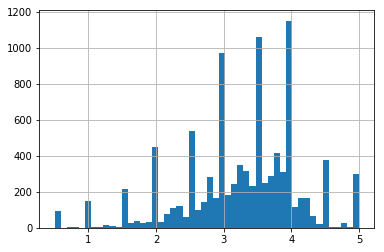

In [16]:
ratings['rating'].hist(bins=50)

#Distribution of the movie rating given by users. This seems like they are way fewer very low ratings than average to high ratings. 


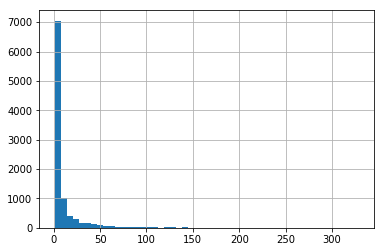

In [17]:
ratings['number_of_ratings'].hist(bins=50)
# Huge number of movies with few ratings

In [18]:
ratings['number_of_ratings'].describe()
#Large amount of movies with few ratings

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: number_of_ratings, dtype: float64

In [19]:
movie_matrix = movie_ratings_df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()
# Each user is a row and the movies are the columns. So you have all the movie ratings for each user in 1 row. 
#And then in each column, you have the name of a movie and all of their ratings in one column. 

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('number_of_ratings', ascending=False).head(100)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [21]:
M_user_rating = movie_matrix['Matrix, The (1999)']
F_user_rating = movie_matrix['Fifth Element, The (1997)']


In [22]:
M_user_rating.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [23]:
F_user_rating.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Fifth Element, The (1997), dtype: float64

In [24]:
similar_to_M=movie_matrix.corrwith(M_user_rating)
similar_to_M.head()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [25]:
similar_to_F= movie_matrix.corrwith(F_user_rating)
similar_to_F.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [26]:
corr_matrix = pd.DataFrame(similar_to_M, columns=['Correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [27]:
corr_fifth = pd.DataFrame(similar_to_F, columns=['Correlation'])
corr_fifth.dropna(inplace=True)
corr_fifth.head()

,Correlation
title,
"'burbs, The (1989)",-0.666230
(500) Days of Summer (2009),0.168795
*batteries not included (1987),0.632456
...And Justice for All (1979),-1.000000
10 Cent Pistol (2015),1.000000


In [28]:
corr_matrix = corr_matrix.join(ratings['number_of_ratings'])
corr_fifth = corr_fifth.join(ratings['number_of_ratings'])

In [29]:
corr_matrix.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [30]:
corr_fifth.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.666230,17
(500) Days of Summer (2009),0.168795,42
*batteries not included (1987),0.632456,7
...And Justice for All (1979),-1.000000,3
10 Cent Pistol (2015),1.000000,2


In [31]:
corr_matrix[corr_matrix['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145
"Grand Budapest Hotel, The (2014)",0.543633,52
"Matrix Reloaded, The (2003)",0.522551,96


In [32]:
corr_matrix[corr_matrix['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238


In [33]:
corr_matrix[corr_matrix['number_of_ratings'] > 200].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Matrix, The (1999)",1.000000,278
Braveheart (1995),0.496045,237
Jurassic Park (1993),0.427936,238
Fight Club (1999),0.417196,218
Seven (a.k.a. Se7en) (1995),0.388752,203
Star Wars: Episode V - The Empire Strikes Back (1980),0.339345,211
"Usual Suspects, The (1995)",0.338257,204
Pulp Fiction (1994),0.330602,307
Star Wars: Episode IV - A New Hope (1977),0.324533,251


In [34]:
corr_fifth[corr_fifth['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Fifth Element, The (1997)",1.000000,116
District 9 (2009),0.691347,65
"Avengers, The (2012)",0.555079,69
"Lock, Stock & Two Smoking Barrels (1998)",0.518011,67
Batman Begins (2005),0.476732,116
Guardians of the Galaxy (2014),0.474093,59
"Grand Budapest Hotel, The (2014)",0.471159,52
Snatch (2000),0.464481,93
"Dark Knight Rises, The (2012)",0.443064,76


In [35]:
corr_fifth[corr_fifth['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Fifth Element, The (1997)",1.000000,116
Batman Begins (2005),0.476732,116
Spider-Man (2002),0.410914,122
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.351530,133
Kill Bill: Vol. 1 (2003),0.313703,131
Ocean's Eleven (2001),0.309800,119
Independence Day (a.k.a. ID4) (1996),0.287001,202
Home Alone (1990),0.277442,116
True Lies (1994),0.275744,178


In [36]:
corr_fifth[corr_fifth['number_of_ratings'] > 200].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Independence Day (a.k.a. ID4) (1996),0.287001,202
Toy Story (1995),0.240196,215
Fight Club (1999),0.178398,218
Star Wars: Episode IV - A New Hope (1977),0.138773,251
"Shawshank Redemption, The (1994)",0.132733,317
"Matrix, The (1999)",0.128010,278
Jurassic Park (1993),0.123834,238
American Beauty (1999),0.100310,204
Terminator 2: Judgment Day (1991),0.098291,224
